IMPORTING LIB FOR PROJECT 


In [1]:
import pandas as pd 
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [3]:
dataframe=pd.read_csv('C:/Users/abi04/OneDrive/Documents/NLP_SPAM/spam_mail/emails.csv')
dataframe

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


naive baiyes and svm for spam detection

In [4]:
dataframe.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
dataframe.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [6]:
dataframe.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [8]:
dataframe.isnull().sum()


text    0
spam    0
dtype: int64

making int into object of column no.2

In [9]:
X=dataframe['text'].astype(str)
y=dataframe['spam'].replace({0:"Not Spam",1:"Spam"}).astype("object")

train and text data splitting 


In [10]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

TF-IDF (Term Frequency-Inverse Document Frequency) text data into tfidif

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer(stop_words='english')
X_train_v=vect.fit_transform(X_train)
X_test_v=vect.transform(X_test)

In [12]:
X_array=X_train_v.toarray()
X_array

array([[0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.311859, 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       ...,
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ]])

In [13]:
y_train

951         Spam
1760    Not Spam
3360    Not Spam
3930    Not Spam
1201        Spam
          ...   
967         Spam
4847    Not Spam
3650    Not Spam
3073    Not Spam
3732    Not Spam
Name: spam, Length: 4296, dtype: object

In [14]:
dataframe_arr=pd.DataFrame(X_array,columns=vect.get_feature_names_out())
dataframe_arr

,00,000,0000,000000,00000000,0000000000,000000000003619,000000000003991,000000000003997,000000000005409,...,zuzana,zwabic,zwischen,zwrocic,zwwyw,zwzm,zyban,zygoma,zzncacst,zzzz
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.311859,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.149018,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,0.192638,0.028654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4292,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4293,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4294,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
dataframe_arr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4296 entries, 0 to 4295
Columns: 32165 entries, 00 to zzzz
dtypes: float64(32165)
memory usage: 1.0 GB


In [16]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_v,y_train)

prediction=lr.predict(X_test_v)

counting words in column 'spam'

In [17]:
def count_word(word, column):
  words = dataframe[column].astype(str).str.lower().str.split()
  counts = words.apply(lambda x: x.count(word))
  return counts.sum()

word = '0'
column = 'spam'
frequency_0 = count_word(word, column)

In [18]:
word = '1'
column = 'spam'
frequency_1 = count_word(word, column)


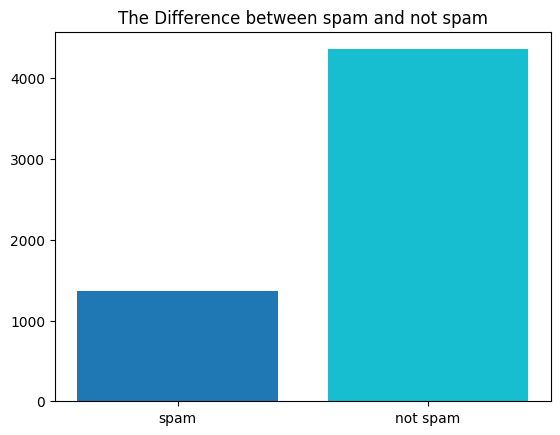

In [19]:
def plot():
    words = ['spam','not spam']
    freq = [frequency_1 , frequency_0]
    plt.bar(words,freq, color=['tab:blue', 'tab:cyan']) # I like them colors
    plt.title('The Difference between spam and not spam')
    plt.show()
plot()

heatmap with confusion matrix 

accuracy test

0.9769553072625698
              precision    recall  f1-score   support

    Not Spam       0.97      1.00      0.98      1075
        Spam       0.99      0.92      0.95       357

    accuracy                           0.98      1432
   macro avg       0.98      0.96      0.97      1432
weighted avg       0.98      0.98      0.98      1432



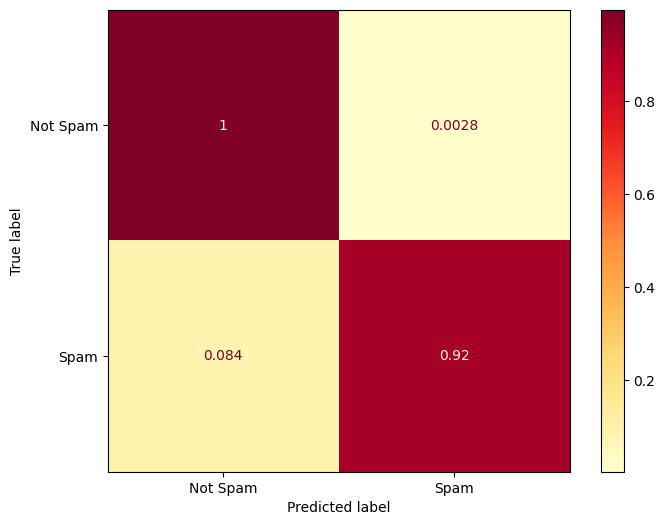

In [20]:
from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix,ConfusionMatrixDisplay
accuracy=accuracy_score(prediction,y_test)
print(accuracy)

target_names=['Not Spam','Spam']
print(classification_report(y_test,prediction.reshape(-1,1),target_names=target_names))

cm = confusion_matrix(y_test, prediction.reshape(-1, 1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='YlOrRd')  # colormap  Yellow-Orange-Red



Precision: The ability of the classifier not to label as positive a sample that is negative.

Recall: The ability of the classifier to find all the positive samples.

F1-Score: The weighted harmonic mean of precision and recall.

Support: The number of actual occurrences of the class in the specified dataset.

In [21]:
test=['Hi,my name is ABINESH  and I am sending this email to you .']
test_1=vect.transform(test)

In [22]:
test_1_prediction=lr.predict(test_1)
test_1_prediction

array(['Not Spam'], dtype=object)

In [23]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

predictions = model.predict(X_test)


checking the probability of spam vs no-spam in the given spam (top words)

In [24]:

feature_names = model.named_steps['countvectorizer'].get_feature_names_out()

# Get log probabilities from the trained Naive Bayes model
log_probabilities = model.named_steps['multinomialnb'].feature_log_prob_

# Create a dataframe of feature names and their log probabilities for each class
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'LogProbability_Spam': log_probabilities[1], 'LogProbability_NotSpam': log_probabilities[0]})

print("Top words contributing to spam:")
print(feature_importance_df.sort_values(by='LogProbability_Spam', ascending=False).head(10))

print("\nTop words contributing to non-spam:")
print(feature_importance_df.sort_values(by='LogProbability_NotSpam', ascending=False).head(10))

Top words contributing to spam:
      Feature  LogProbability_Spam  LogProbability_NotSpam
29132     the            -3.549118               -3.268679
29431      to            -3.634977               -3.475351
4201      and            -3.869952               -3.957326
21165      of            -4.029806               -4.095876
32232     you            -4.122605               -4.341508
15695      in            -4.392147               -4.349750
32242    your            -4.430400               -5.279993
13080     for            -4.564765               -4.394633
16485      is            -4.639611               -4.731008
29221    this            -4.707449               -5.023193

Top words contributing to non-spam:
      Feature  LogProbability_Spam  LogProbability_NotSpam
29132     the            -3.549118               -3.268679
29431      to            -3.634977               -3.475351
4201      and            -3.869952               -3.957326
21165      of            -4.029806            

misclassified smaples 

In [25]:
test_set_predictions = X_test.to_frame().assign(Predicted=predictions, Actual=y_test)

misclassified_samples = test_set_predictions[test_set_predictions['Predicted'] != test_set_predictions['Actual']]
print("Misclassified samples:")
print(misclassified_samples.head(10))

Misclassified samples:
                                                   text Predicted    Actual
2400  Subject: continental phone #  1 - 800 - 621 - ...      Spam  Not Spam
4455  Subject: linux - - hit or miss ?  network worl...      Spam  Not Spam
4146  Subject: bonds  hello , vince .  we still have...      Spam  Not Spam
4406  Subject: usaee conference update from louise b...      Spam  Not Spam
3733  Subject: department of energy is deploying a c...      Spam  Not Spam
3633  Subject: oracle nt client software upgrade - m...      Spam  Not Spam
5048  Subject: free latex  go to http : / / www . wi...      Spam  Not Spam
2842  Subject: a basic idea of price - offer matchin...      Spam  Not Spam
4327  Subject: your confirmation is needed  please r...      Spam  Not Spam
2051  Subject: new frbny research : 5 / 3  please re...      Spam  Not Spam


roc,auc curve ploting (to check the performance of the model)

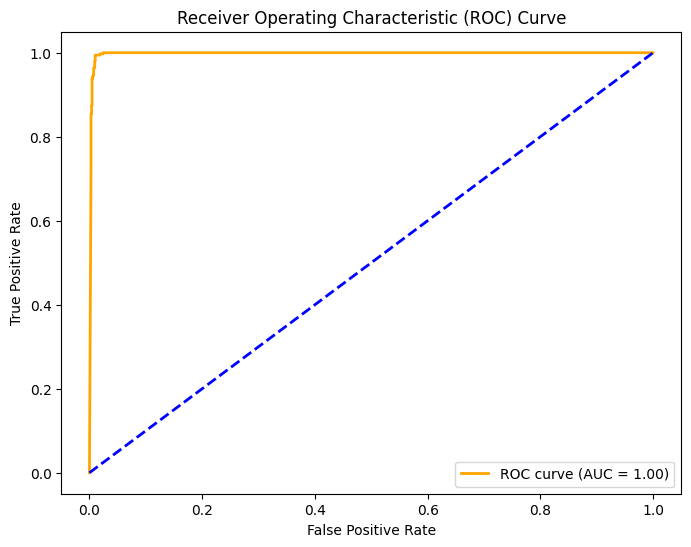

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc


label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

probabilities = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_encoded, probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

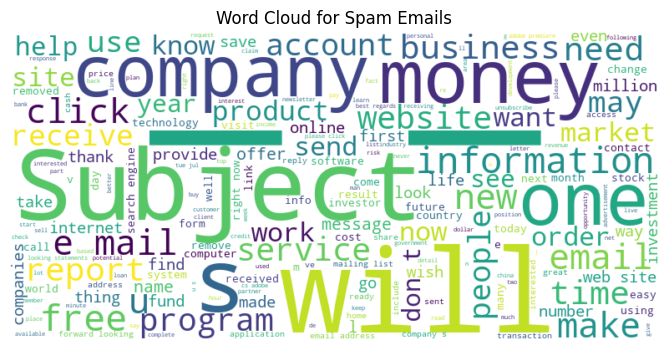

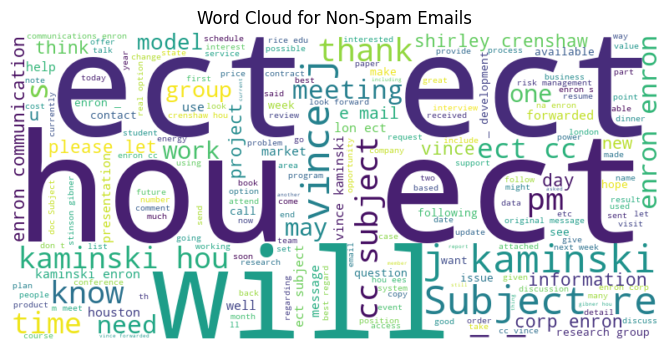

In [27]:
from wordcloud import WordCloud

spam_words = ' '.join(dataframe[dataframe['spam'] == 1]['text'])
non_spam_words = ' '.join(dataframe[dataframe['spam'] == 0]['text'])


wordcloud_spam = WordCloud(width=777, height=369, background_color='white').generate(spam_words)
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Word Cloud for Spam Emails')
plt.axis('off')
plt.show()


wordcloud_non_spam = WordCloud(width=777, height=369, background_color='white').generate(non_spam_words)
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud_non_spam, interpolation='bilinear')
plt.title('Word Cloud for Non-Spam Emails')
plt.axis('off')
plt.show()

Most frequent words

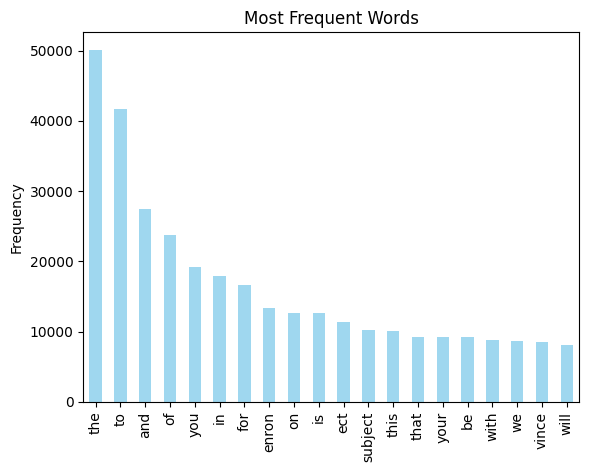

In [28]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(max_features=20)
X = vectorizer.fit_transform(dataframe['text'])
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_freq.sum().sort_values(ascending=False).plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Most Frequent Words')
plt.ylabel('Frequency')
plt.show()

Average word length for spam

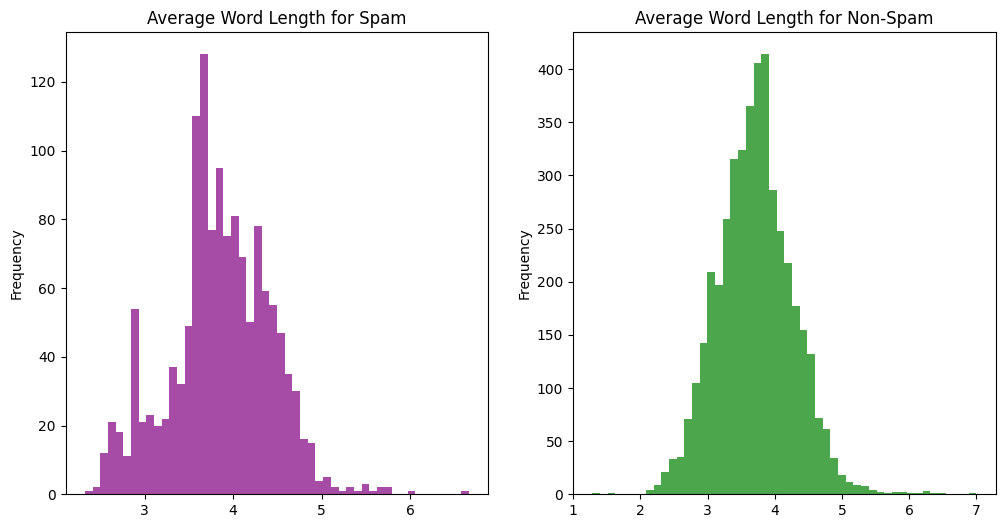

In [41]:
##['avg_word_length']=dataframe['text'].apply(lambda x: sum(len(word)))
dataframe['avg_word_length'] = dataframe['text'].apply(lambda x: sum(len(word)
for word in x.split()) / len(x.split()))


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
dataframe[dataframe['spam'] == 1]['avg_word_length'].plot(kind='hist', bins=50, color='purple', alpha=0.7)
plt.title('Average Word Length for Spam')

plt.subplot(1, 2, 2)
dataframe[dataframe['spam'] == 0]['avg_word_length'].plot(kind='hist', bins=50, color='green', alpha=0.7)
plt.title('Average Word Length for Non-Spam')

plt.show()


distribution of spam vs non spam 

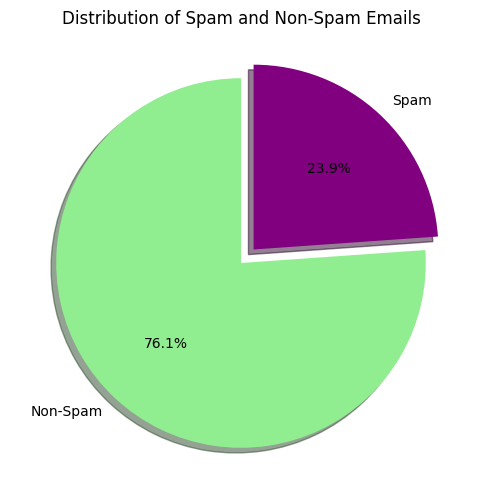

In [37]:
#pie_chart of distribution of spam vs non_spam
plt.figure(figsize=(6, 6))
labels = ['Non-Spam', 'Spam']
sizes = dataframe['spam'].value_counts()
colors = ['lightgreen', 'purple']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Distribution of Spam and Non-Spam Emails')
plt.show()